In [83]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')


In [84]:
warnings.filterwarnings('ignore')

In [85]:
df = pd.read_csv("/content/stocks.csv")
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [86]:
print(df.head())
print(df.shape)
print(df.columns)

  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  
(248, 8)
Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')


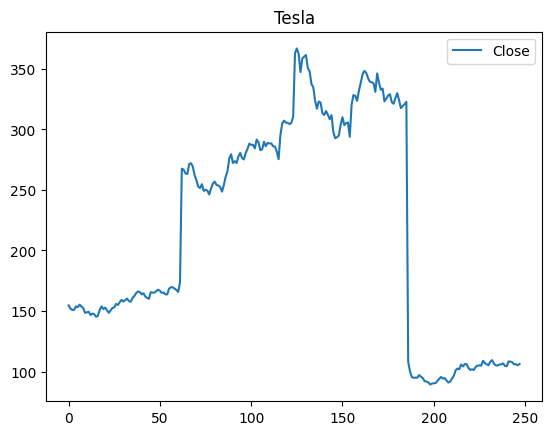

In [87]:
df[['Close']].plot()
plt.title("Tesla")
plt.show()

Text(0.5, 1.0, 'Tesla Cumulative Returns')

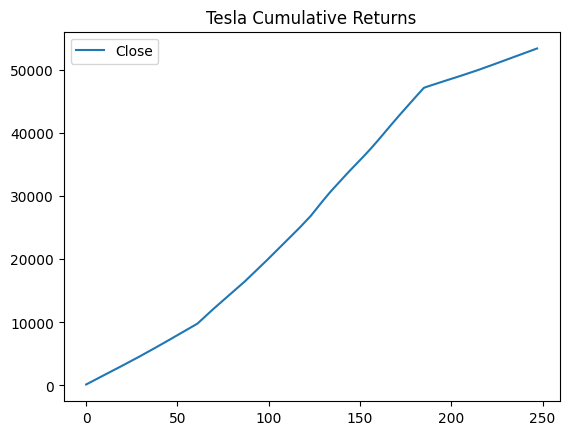

In [88]:
# Comulative Return
for column in df.select_dtypes(include=['number']).columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

dr = df[['Close']].cumsum()
dr.plot()
plt.title('Tesla Cumulative Returns')

Text(0.5, 1.0, 'Tesla Autocorrelation plot')

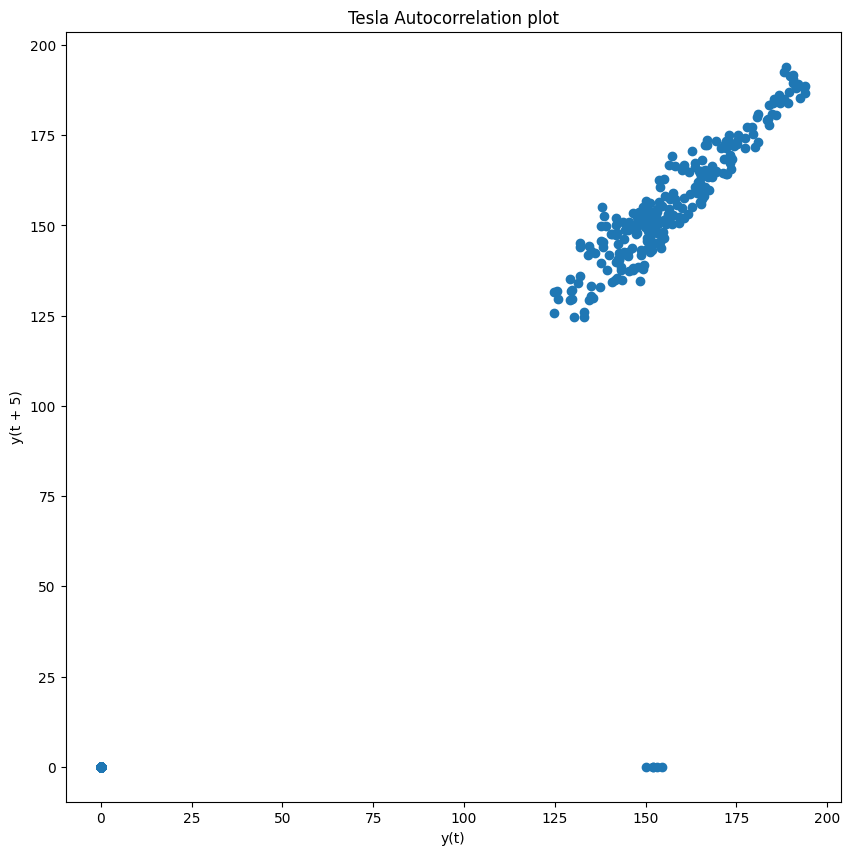

In [ ]:
plt.figure(figsize=(10,10))
# Check if the column name is 'Open' or 'open'
# Replace 'Open' with the actual column name from your DataFrame
lag_plot(df['Close'], lag=5)
plt.title('Tesla Autocorrelation plot')

In [ ]:
# Assuming 'Date' is a column and you want to access the 1857th row
# Use .iloc to access rows by their position
if 1857 < len(df):
  date_value = df['Date'].iloc[1857]
  print(date_value)
else:
  print(f"Index 1857 is out of bounds for DataFrame with {len(df)} rows.")

# OR if you know the specific date you're looking for you can use:
# date_value = df[df['Date'] == 'your_specific_date']['Date'].values[0]

# Example using iloc with error handling:
try:
    date_value = df['Date'].iloc[1857]
    print(date_value)
except IndexError:
    print(f"Index 1857 is out of bounds for DataFrame with {len(df)} rows.")

Index 1857 is out of bounds for DataFrame with 594 rows.
Index 1857 is out of bounds for DataFrame with 594 rows.


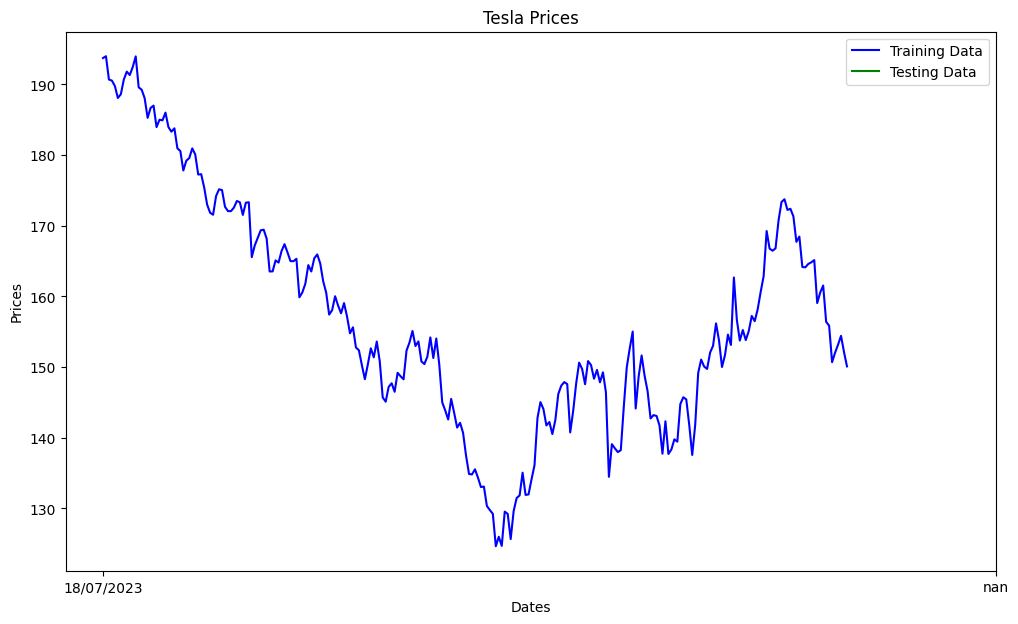

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')

# Calculate the number of ticks needed
num_ticks = len(np.arange(0, len(df), 300))

# Select the date labels to match the number of ticks
date_labels = df['Date'][0:len(df):300]
# If num_ticks and len(date_labels) don't match, adjust accordingly

# Ensure you have enough labels for the ticks
if len(date_labels) < num_ticks:
    # Example: Fill with empty strings if not enough labels
    date_labels = list(date_labels) + [''] * (num_ticks - len(date_labels))
elif len(date_labels) > num_ticks:
    date_labels = date_labels[:num_ticks]  # Trim excess labels

plt.xticks(np.arange(0, len(df), 300), date_labels)  # Update xticks with appropriate labels
plt.legend()

In [ ]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [ ]:
# Replace '/absolute/path/to/your/file/msft.us.txt' with the actual path to your file
# For example:
file_path = '/content/AAPL_short_volume.csv'  # If 'msft.us.txt' is in the '/content/' directory

# Now read the file:
df = pd.read_csv(file_path).fillna(0)
df.head()

,Date,Short Vol,Short Exempt Vol,Total Vol,% Shorted,Close
0,18/07/2023,8974071.0,92762.0,19136383.0,46.90,193.729996
1,17/07/2023,9867747.0,77497.0,19106282.0,51.65,193.990005
2,14/07/2023,6363715.0,98141.0,15104938.0,42.13,190.690002
3,13/07/2023,6148358.0,66729.0,16166076.0,38.03,190.539993
4,12/07/2023,8580496.0,84584.0,21275653.0,40.33,189.770004


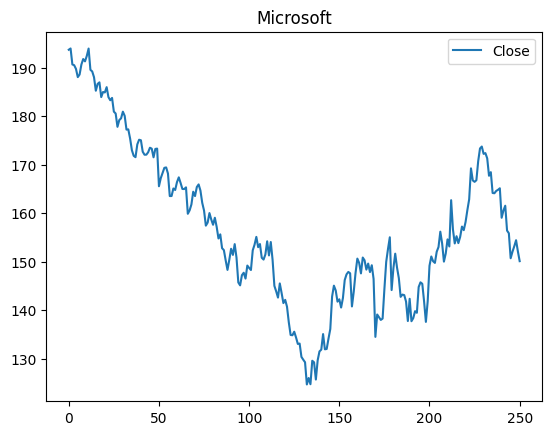

In [ ]:
df[['Close']].plot()
plt.title("Microsoft")
plt.show()

Text(0.5, 1.0, 'Microsoft Cumulative Returns')

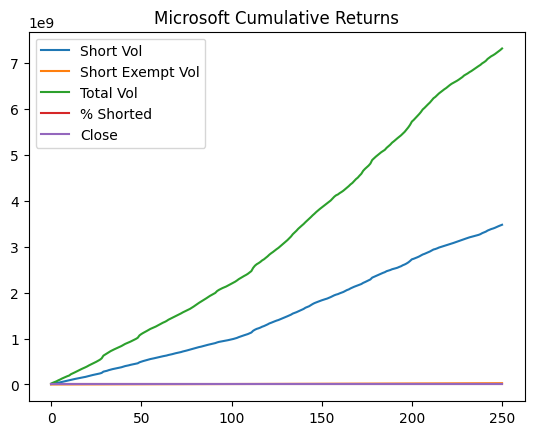

In [ ]:
# Comulative Return
# Select only numerical columns for cumsum
dr = df.select_dtypes(include=['number']).cumsum()
dr.plot()
plt.title('Microsoft Cumulative Returns')

Text(0.5, 1.0, 'Microsoft Autocorrelation plot')

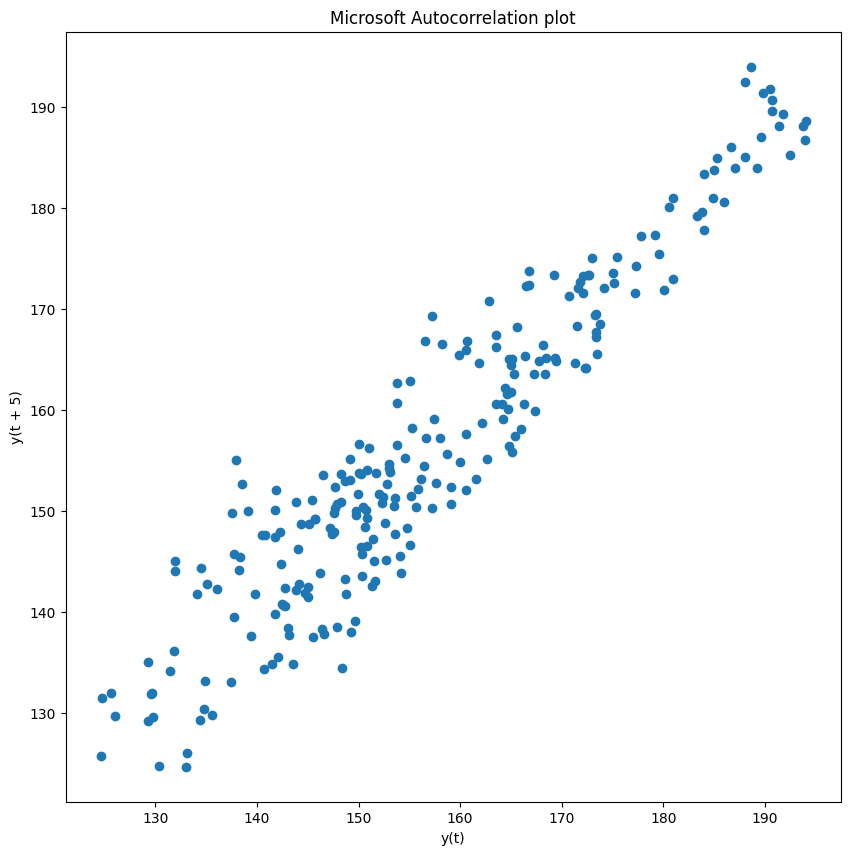

In [ ]:
plt.figure(figsize=(10,10))
# Assuming the column you want is 'Close', if not change it to the correct column name.
lag_plot(df['Close'], lag=5)
plt.title('Microsoft Autocorrelation plot')

In [77]:
# Assuming 'Date' is a column and you want to access the 7982nd row
# Use .iloc to access rows by their position
# Check if the index is within the bounds of the DataFrame
if 7982 < len(df):
  date_value = df['Date'].iloc[7982]
  print(date_value)
else:
  print(f"Index 7982 is out of bounds for DataFrame with {len(df)} rows.")


Index 7982 is out of bounds for DataFrame with 594 rows.


In [ ]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

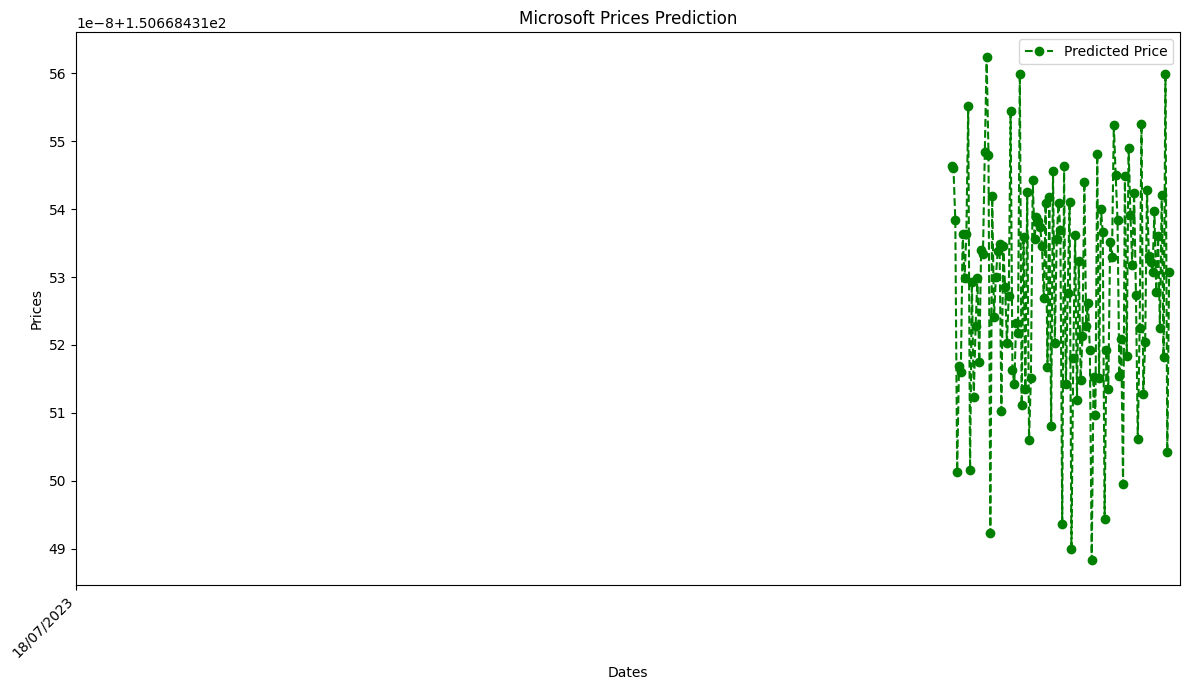

In [ ]:
plt.figure(figsize=(12,7))

plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')

plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')

# Adjust x-axis ticks to align with the 'Date' column
tick_positions = np.arange(0, len(df), 1300)  # Adjust step as needed
date_labels = df['Date'].iloc[tick_positions].tolist()  # Get corresponding date labels

plt.xticks(tick_positions, date_labels, rotation=45, ha='right')  # Set x-ticks and rotate labels
plt.legend()
plt.tight_layout()  # Prevent overlapping labels
plt.show()

In [93]:
import pandas as pd
stocks_data = pd.read_csv('/content/stocks.csv')
stocks_data

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [94]:
stocks_data.Ticker.value_counts()

,count
Ticker,
AAPL,62
MSFT,62
NFLX,62
GOOG,62


In [95]:
descriptive_stats = stocks_data.groupby('Ticker')
descriptive_stats['Close'].describe()

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,62.0,158.240645,7.360485,145.309998,152.077499,158.055000,165.162506,173.570007
GOOG,62.0,100.631532,6.279464,89.349998,94.702501,102.759998,105.962503,109.459999
MSFT,62.0,275.039839,17.676231,246.270004,258.742500,275.810013,287.217506,310.649994
NFLX,62.0,327.614677,18.554419,292.760010,315.672493,325.600006,338.899994,366.829987


In [96]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])
pivot_data = stocks_data.pivot(index='Date',columns='Ticker',values='Close')
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['AAPL'],name='AAPL'))
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['GOOG'],name='GOOG'))
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['NFLX'],name='NFLX'))
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['MSFT'],name='MSFT'))

fig.update_layout(
    title_text="Time Series of Closing Prices",
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='Ticker',
    showlegend=True
)

fig.show()

In [97]:
volatility = pivot_data.std()
fig = px.bar(
    volatility,
    x=volatility.index,
    y=volatility.values,
    labels={
        'y':'Standard Deviation',
        'x':'Ticker'
    },
    title='Volatility of Closing Prices (Standard Deviation)'
    )
fig.show()

In [98]:
correlation_matrix = pivot_data.corr()
fig = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale='blues',
        colorbar=dict(title='correlation'),
        text=correlation_matrix.round(2).values,
        texttemplate="%{text}"
    )
)
fig.update_layout(
    title='Correlation Matrix of Closing Prices',
    xaxis_title="Ticker",
    yaxis_title="Ticker",
)
fig.show()